In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_colwidth', 400)

In [3]:
datapath_base = 'data/negotiate/'
datapath_pp = 'data/negotiate_prepend/'
datapath_rp = 'data/negotiate_replace/'

In [4]:
def load_dfs(datapath):
    dfs = []
    for file in os.listdir(datapath):
        if "csv" in file:
            df = pd.read_csv(os.path.join(datapath, file), index_col = 0)
            #collapse no deal tokens
            df.loc[df['target'].str.contains('<disagree>'), 'target'] = "Disagree"
            df.loc[df['target'].str.contains('<no agreement>'), 'target'] = "Disagree"
            df.loc[df['target'].str.contains('<disconnect>'), 'target'] = "Disagree"
            df.loc[df['output'].str.contains('<disagree>'), 'output'] = "Disagree"
            df.loc[df['output'].str.contains('<no agreement>'), 'output'] = "Disagree"
            df.loc[df['output'].str.contains('<disconnect>'), 'output'] = "Disagree"
            dfs.append(df)
    return dfs

In [5]:
base_dfs = load_dfs(datapath_base)
pp_dfs = load_dfs(datapath_pp)
rp_dfs = load_dfs(datapath_rp)

In [6]:
def get_acc(df_list):
    accs = []
    for df in df_list:
        accs.append((df['target'] == df['output']).mean() * 100)
    return accs

In [7]:
acc_df = pd.DataFrame({'Base':get_acc(base_dfs), 'Prepended':get_acc(pp_dfs), 'Replaced':get_acc(rp_dfs)})
acc_df

,Base,Prepended,Replaced
0,69.866920,68.726236,65.019011
1,71.958175,70.057034,65.494297
2,69.771863,68.441065,64.068441
3,70.722433,69.486692,66.539924
4,71.958175,68.536122,65.114068


NameError: name 'np' is not defined

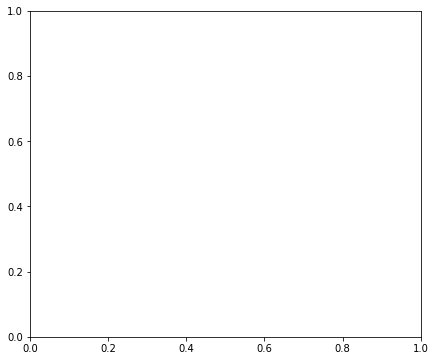

In [8]:
labs = acc_df.columns
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
ax = axs
ax.bar(np.arange(len(labs)), acc_df.mean(), yerr=acc_df.std(), align='center', alpha=0.5, ecolor='black', capsize=30)
ax.set_ylabel('Exact Match (%)')
ax.set_xticks(np.arange(len(labs)))
ax.set_xticklabels(labs, rotation=90)
ax.set_title('OOF Selection Model Accuracy')

## Sample of Errors

In [ ]:
def get_error_sample(df):
    return df[df['output'] != df['target']].head()

## Base

In [ ]:
get_error_sample(base_dfs[0])

## Prepended

In [ ]:
get_error_sample(pp_dfs[0])

## Replaced

In [ ]:
get_error_sample(rp_dfs[0])